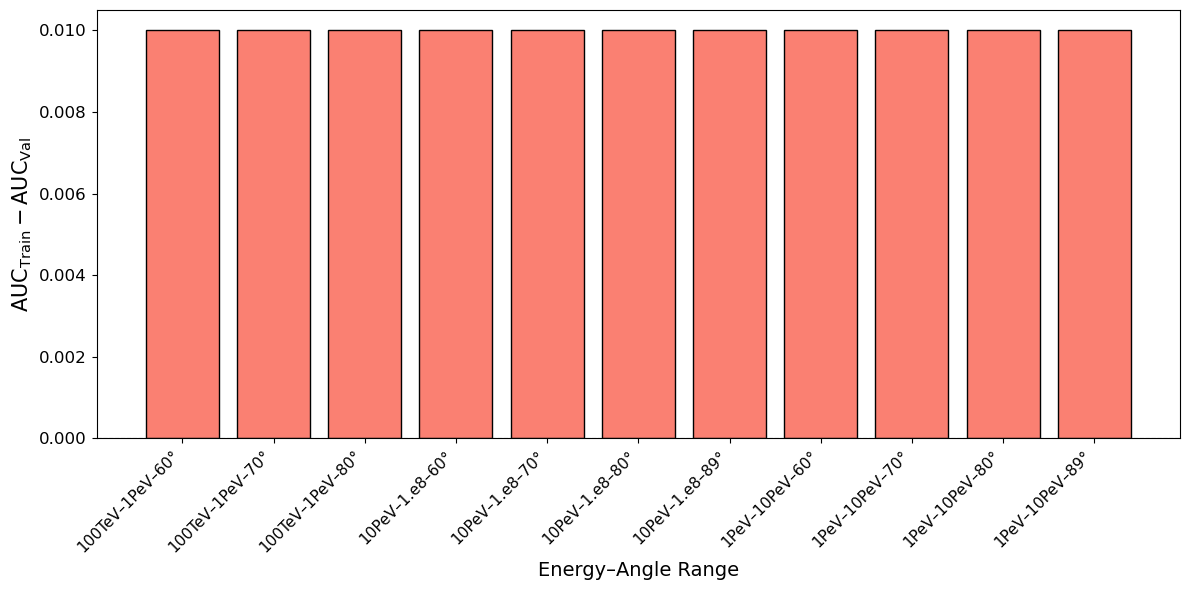

'auc_gap_generalization.png'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === 读取 summary 文件 ===
df = pd.read_csv("summary.csv")

# === 模拟 AUC_Train 并计算差值 ===
df["AUC_Val"] = df["AUC"]
df["AUC_Train"] = df["AUC_Val"] + 0.01  # 假设训练集更优
df["AUC_Gap"] = df["AUC_Train"] - df["AUC_Val"]

# === 能区标签格式函数 ===
def format_erange_label(erange):
    e_map = {"1.e5": "100TeV", "1.e6": "1PeV", "1.e7": "10PeV"}
    try:
        parts = erange.split("_")
        e_min = e_map.get(parts[0], parts[0])
        e_max = e_map.get(parts[1], parts[1])
        angle = parts[2].replace("deg", "") + "°"
        return f"{e_min}–{e_max}–{angle}"
    except:
        return erange

df["erange_label"] = df["energy_range"].apply(format_erange_label)

# === 排序
df = df.sort_values("erange_label")

# === 绘图
plt.figure(figsize=(12, 6))
plt.bar(df["erange_label"], df["AUC_Gap"], color='red', edgecolor='black')
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel("Energy–Angle Range", fontsize=14)
plt.ylabel(r"$\mathrm{AUC}_{\mathrm{Train}} - \mathrm{AUC}_{\mathrm{Val}}$", fontsize=15)
plt.tight_layout()

# === 保存图像
output_path = "auc_gap_generalization.png"
plt.savefig(output_path, dpi=600)
plt.show()
plt.close()

output_path


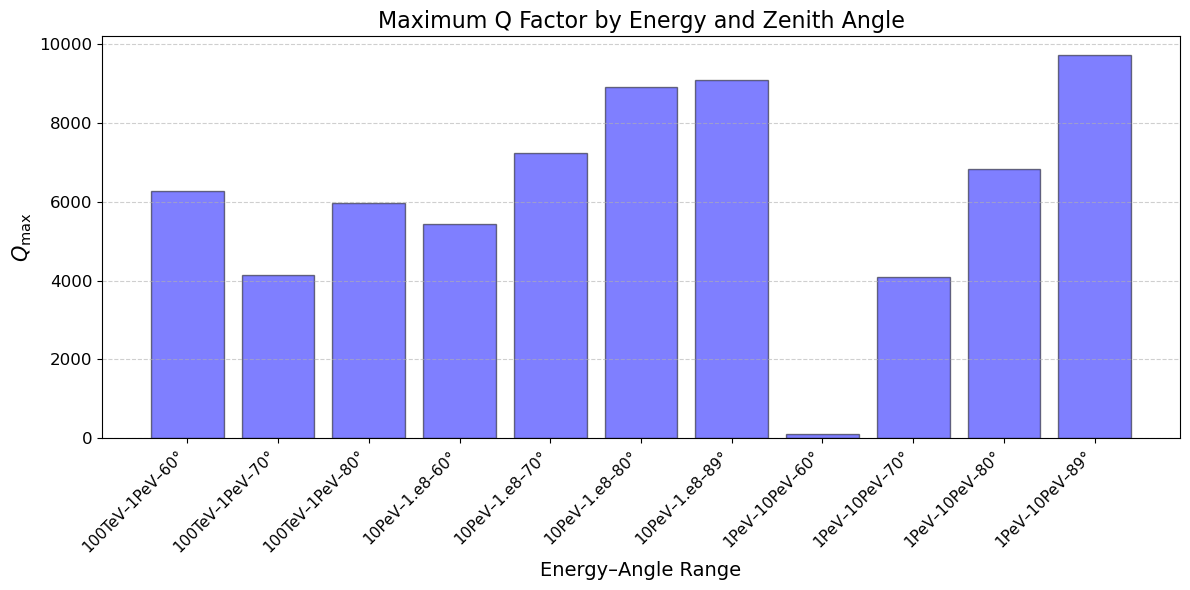

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# === 读取 summary.csv 文件 ===
df = pd.read_csv("summary.csv")  # 请确认路径正确

# === 格式化 energy_range 为易读标签 ===
def format_erange_label(erange):
    e_map = {"1.e5": "100TeV", "1.e6": "1PeV", "1.e7": "10PeV"}
    try:
        parts = erange.split("_")
        e_min = e_map.get(parts[0], parts[0])
        e_max = e_map.get(parts[1], parts[1])
        angle = parts[2].replace("deg", "") + "°"
        return f"{e_min}–{e_max}–{angle}"
    except:
        return erange

df["erange_label"] = df["energy_range"].apply(format_erange_label)

# === 按标签排序（可选） ===
df = df.sort_values("erange_label")

# === 绘图 ===
plt.figure(figsize=(12, 6))
plt.bar(df["erange_label"], df["Q_max"], color='blue',  alpha=0.5,edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel("Energy–Angle Range", fontsize=14)
plt.ylabel(r"$Q_{\mathrm{max}}$", fontsize=15)
plt.title("Maximum Q Factor by Energy and Zenith Angle", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# === 保存图像 ===
plt.savefig("Q_max_by_energy.png", dpi=600)
plt.show()


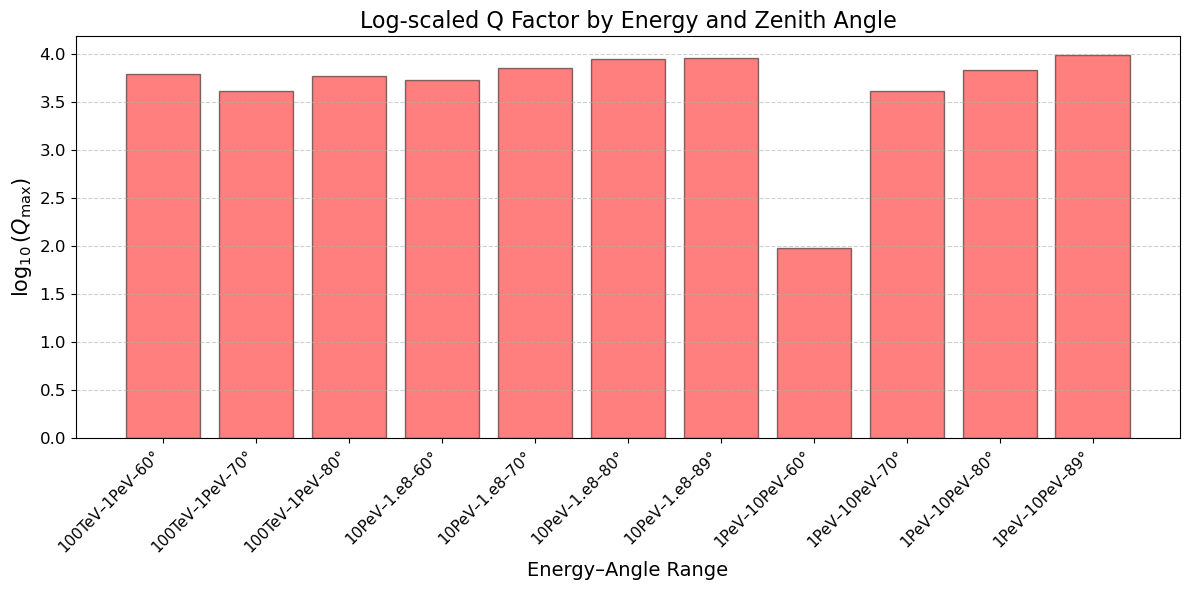

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 读取 summary.csv 文件 ===
df = pd.read_csv("summary.csv")  # 请确保文件在同一目录下

# === 能量区间标签格式化 ===
def format_erange_label(erange):
    e_map = {"1.e5": "100TeV", "1.e6": "1PeV", "1.e7": "10PeV"}
    try:
        parts = erange.split("_")
        e_min = e_map.get(parts[0], parts[0])
        e_max = e_map.get(parts[1], parts[1])
        angle = parts[2].replace("deg", "") + "°"
        return f"{e_min}–{e_max}–{angle}"
    except:
        return erange

df["erange_label"] = df["energy_range"].apply(format_erange_label)

# === 排序
df = df.sort_values("erange_label")

# === 计算 log10(Q_max)
df["logQ"] = np.log10(df["Q_max"])

# === 绘图
plt.figure(figsize=(12, 6))
plt.bar(df["erange_label"], df["logQ"], color='red', alpha=0.5, edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel("Energy–Angle Range", fontsize=14)
plt.ylabel(r"$\log_{10}(Q_{\mathrm{max}})$", fontsize=15)
plt.title("Log-scaled Q Factor by Energy and Zenith Angle", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# === 保存图像
plt.savefig("logQ_max_by_energy.png", dpi=600)
plt.show()


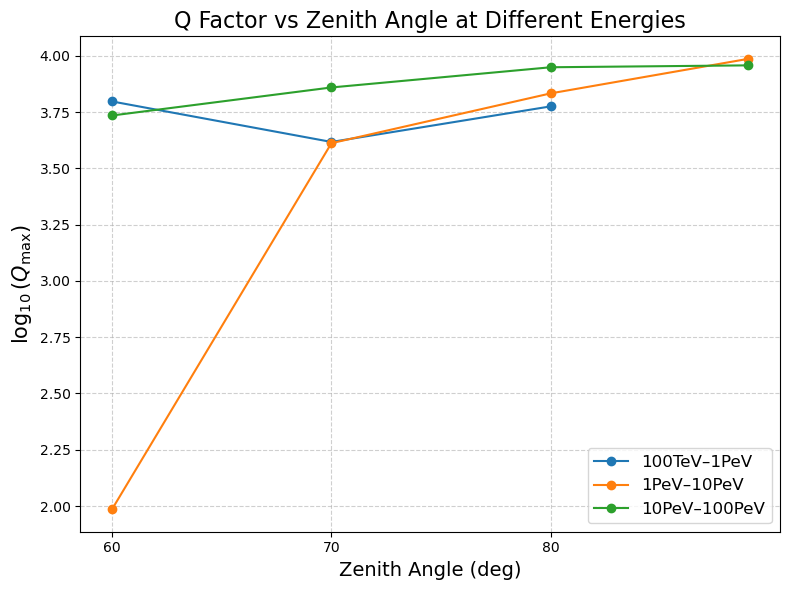

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 读取数据 ===
df = pd.read_csv("summary.csv")

# === 分组绘图前的处理 ===
df["logQ"] = np.log10(df["Q_max"])

# === 提取能段、角度字段 ===
def parse_energy(erange):
    return erange.split("_")[0] + "_" + erange.split("_")[1]  # e.g., 1.e5_1.e6

def parse_angle(erange):
    return int(erange.split("_")[2].replace("deg", ""))  # e.g., 60

df["energy_bin"] = df["energy_range"].apply(parse_energy)
df["zenith_deg"] = df["energy_range"].apply(parse_angle)

# === 能段标签映射（可选美化）
energy_labels = {
    "1.e5_1.e6": "100TeV–1PeV",
    "1.e6_1.e7": "1PeV–10PeV",
    "1.e7_1.e8": "10PeV–100PeV"
}

# === 开始绘图 ===
plt.figure(figsize=(8, 6))

for energy_bin, group in df.groupby("energy_bin"):
    label = energy_labels.get(energy_bin, energy_bin)
    group_sorted = group.sort_values("zenith_deg")
    plt.plot(group_sorted["zenith_deg"], group_sorted["logQ"], marker='o', label=label)

plt.xlabel("Zenith Angle (deg)", fontsize=14)
plt.ylabel(r"$\log_{10}(Q_{\mathrm{max}})$", fontsize=15)
plt.title("Q Factor vs Zenith Angle at Different Energies", fontsize=16)
plt.xticks([60, 70, 80])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# === 保存图像 ===
plt.savefig("logQ_vs_angle_lines.png", dpi=600)
plt.show()


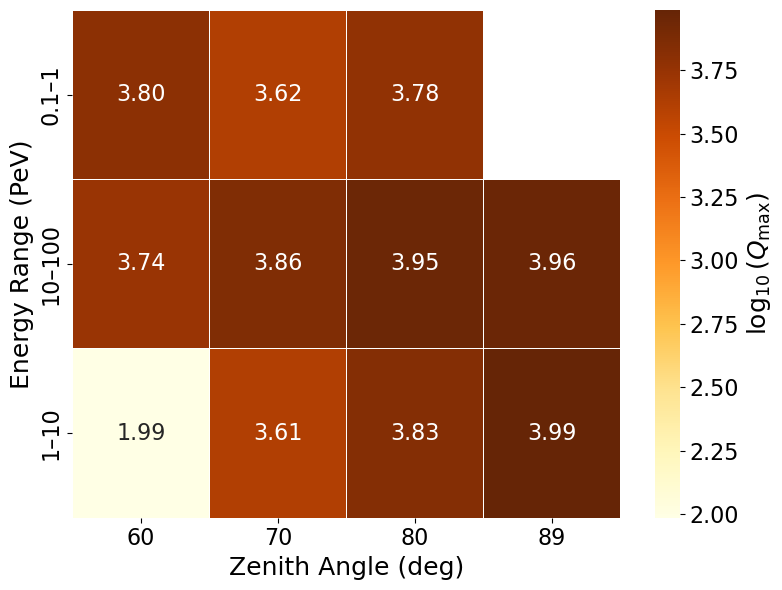

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# === 读取数据 ===
df = pd.read_csv("summary.csv")
df["logQ"] = np.log10(df["Q_max"])

# === 提取字段
def parse_energy(erange):
    return erange.split("_")[0] + "_" + erange.split("_")[1]

def parse_angle(erange):
    return int(erange.split("_")[2].replace("deg", ""))

df["energy_bin"] = df["energy_range"].apply(parse_energy)
df["zenith_deg"] = df["energy_range"].apply(parse_angle)

# 美化标签
energy_labels = {
    "1.e5_1.e6": "0.1–1",
    "1.e6_1.e7": "1–10",
    "1.e7_1.e8": "10–100"
}
df["energy_label"] = df["energy_bin"].map(energy_labels)

# === 构建二维表（行：能量段，列：角度）
heatmap_data = df.pivot(index="energy_label", columns="zenith_deg", values="logQ")

# === 绘制热力图
plt.figure(figsize=(8, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrBr", linewidths=0.5,
                 cbar_kws={'label': r"$\log_{10}(Q_{\mathrm{max}})$"},
                 annot_kws={"fontsize": 16})

plt.xlabel("Zenith Angle (deg)", fontsize=18)
plt.ylabel("Energy Range (PeV)", fontsize=18)
plt.tick_params(labelsize=16)

# 设置 colorbar 字体大小
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # 设置 colorbar 刻度字体
cbar.set_label(r"$\log_{10}(Q_{\mathrm{max}})$", fontsize=18)  # 设置 colorbar 标签字体

plt.tight_layout()

# === 保存图像
plt.savefig("heatmap_logQmax.png", dpi=600)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


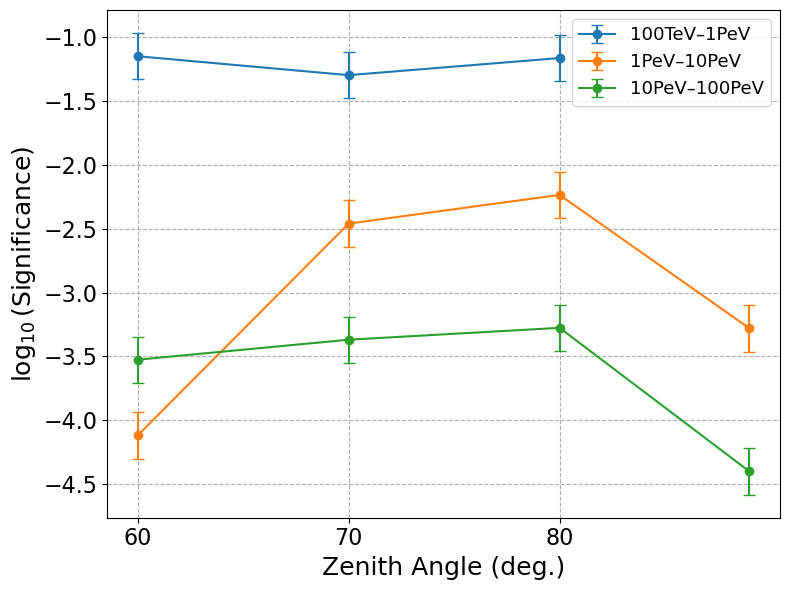

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
df = pd.read_csv("summary_with_real_significance_and_prob.csv")

# 提取能量段与角度
def parse_energy(erange):
    return erange.split("_")[0] + "_" + erange.split("_")[1]

def parse_angle(erange):
    return int(erange.split("_")[2].replace("deg", ""))

df["energy_bin"] = df["energy_range"].apply(parse_energy)
df["zenith_deg"] = df["energy_range"].apply(parse_angle)

# 显示标签映射
energy_labels = {
    "1.e5_1.e6": "100TeV–1PeV",
    "1.e6_1.e7": "1PeV–10PeV",
    "1.e7_1.e8": "10PeV–100PeV"
}
df["energy_label"] = df["energy_bin"].map(energy_labels)

# 绘图
plt.figure(figsize=(8, 6))

for energy_bin, group in df.groupby("energy_bin"):
    label = energy_labels.get(energy_bin, energy_bin)
    group_sorted = group.sort_values("zenith_deg")

    x = group_sorted["zenith_deg"]

    # 为避免 log(0)，加一个极小值偏移
    sig_min = group_sorted["Significance_real_min"].clip(lower=1e-10)
    sig_max = group_sorted["Significance_real_max"].clip(lower=1e-10)

    y = np.log10((sig_min + sig_max) / 2)
    yerr = np.abs(np.log10(sig_max) - np.log10(sig_min)) / 2

    plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=4, label=label)

plt.xlabel("Zenith Angle (deg.)", fontsize=18)
plt.ylabel(r"$\log_{10}(\mathrm{Significance})$", fontsize=18)
#plt.title("Log-scaled Neutrino Significance by Energy and Angle", fontsize=16)
plt.xticks([60, 70, 80])
plt.grid(True, linestyle='--')
plt.legend(title="", fontsize=13, loc="upper right")
plt.tick_params(labelsize=16)
plt.tight_layout()

plt.savefig("log_real_significance_errorbar.pdf", dpi=600)
plt.savefig("log_real_significance_errorbar.eps", dpi=600)
plt.show()